torch-2.6.0
torchvision-0.21.0

In [1]:
!pip install --upgrade pip
!pip install colpali-engine vidore-benchmark


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 207.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 210.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 170.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 158.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━

In [2]:
!pip freeze | grep torch

torch @ https://download.pytorch.org/whl/cu124/torch-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu124/torchaudio-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl
torchsummary==1.5.1
torchvision @ https://download.pytorch.org/whl/cu124/torchvision-0.21.0%2Bcu124-cp311-cp311-linux_x86_64.whl


In [20]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

## Simple test of ColQuwen2

In [ ]:
!pip install pdf2image

In [ ]:
!apt-get update && apt-get install -y poppler-utils #For pdf2image

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,931 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,211 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2

In [ ]:
from PIL import Image
from transformers.utils.import_utils import is_flash_attn_2_available
import os
from pdf2image import convert_from_path
from colpali_engine.models import ColQwen2, ColQwen2Processor

In [ ]:
model_name = "vidore/colqwen2-v1.0"

model = ColQwen2.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="cuda:0",  # or "mps" if on Apple Silicon
    attn_implementation="flash_attention_2" if is_flash_attn_2_available() else None,
).eval()

processor = ColQwen2Processor.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


adapter_model.safetensors:   0%|          | 0.00/74.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
pdf_path = "_10-Géospatial.pdf"
pages: list[Image.Image] = convert_from_path(pdf_path, dpi=200)
images = [page.convert("RGB") for page in pages]


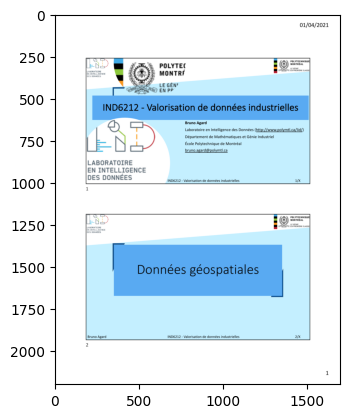

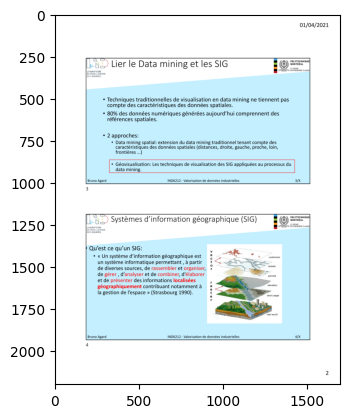

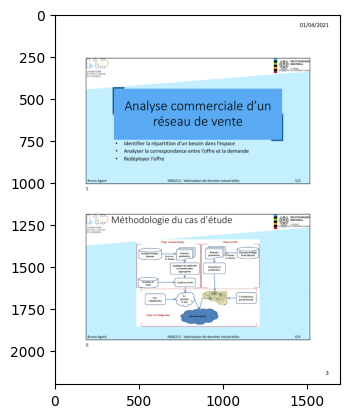

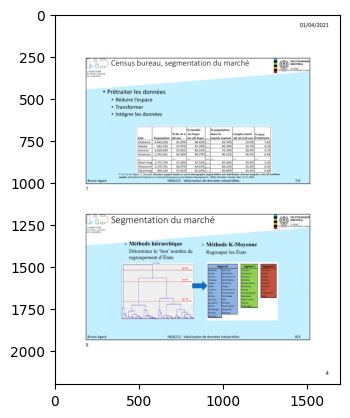

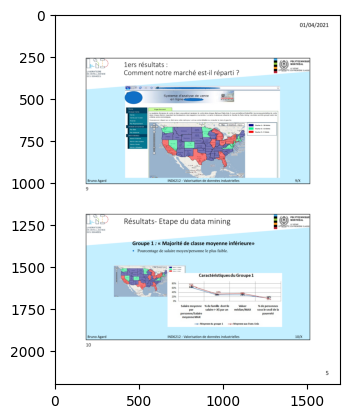

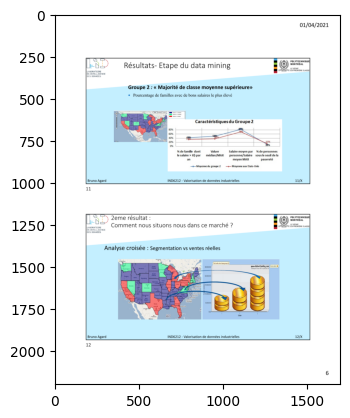

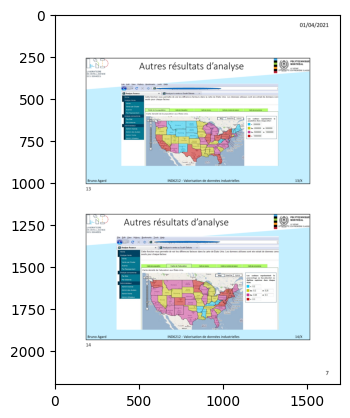

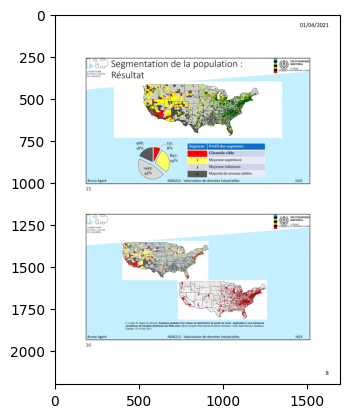

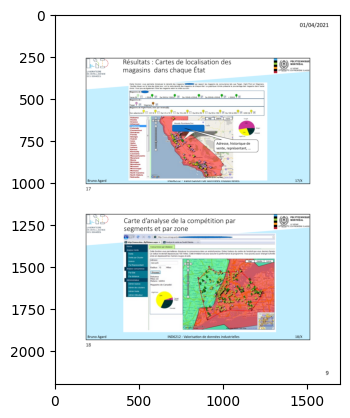

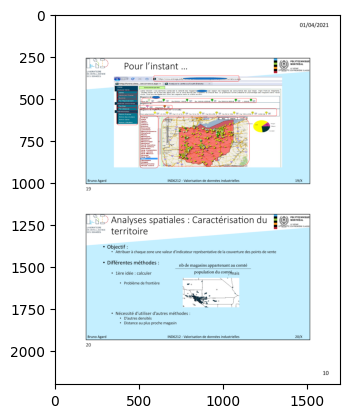

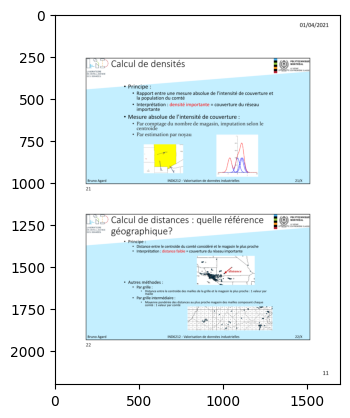

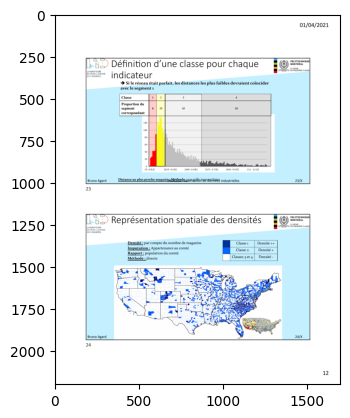

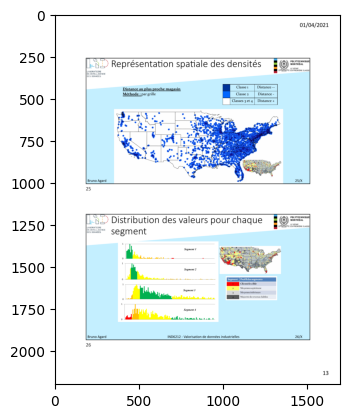

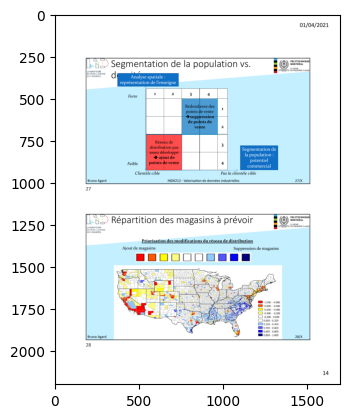

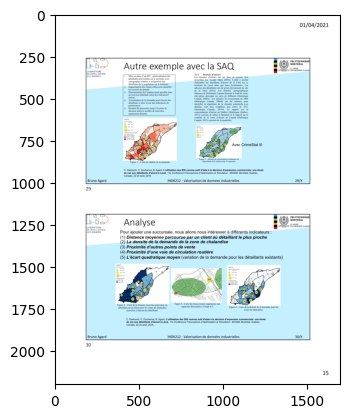

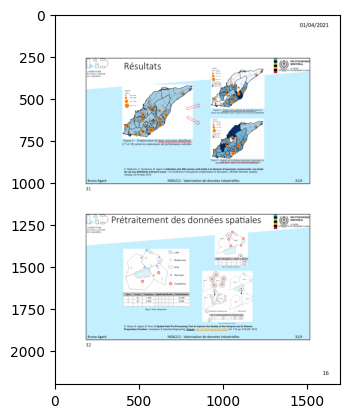

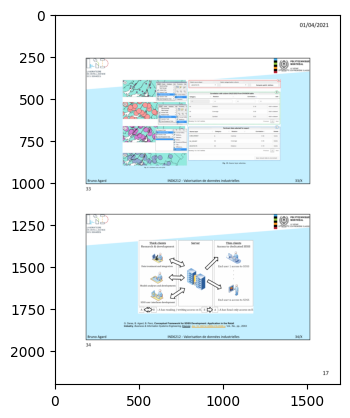

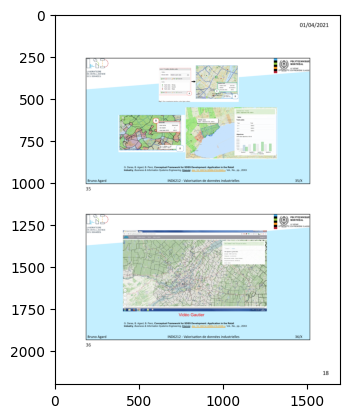

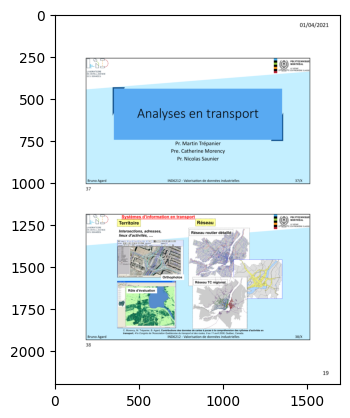

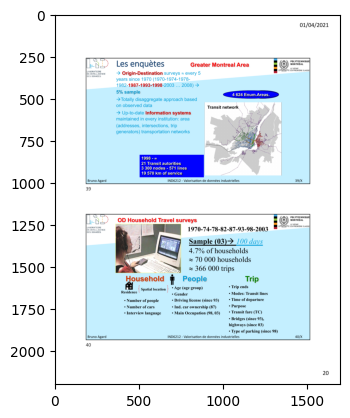

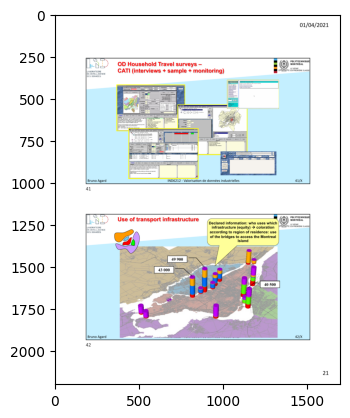

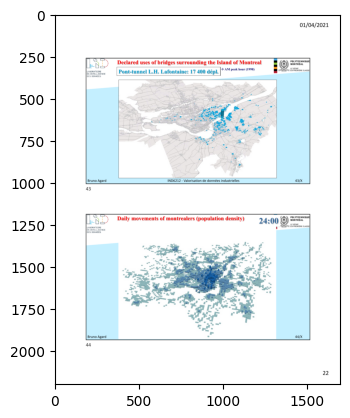

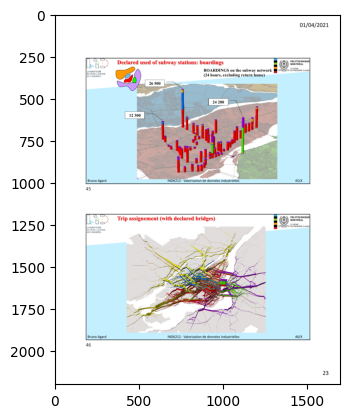

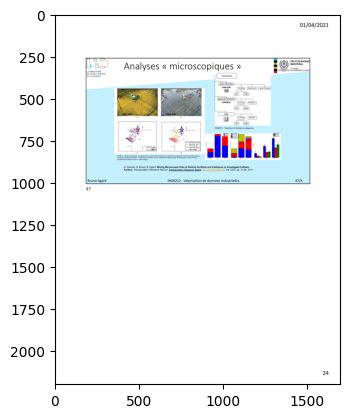

In [ ]:
for image in images:
    #plot image
    plt.imshow(image)
    plt.show()

In [ ]:
queries = [
    "Quand est sortie la définition de SIG ?",
    "Quelle graphique permet de voir les différentes partie d'une methode?",
]

In [ ]:
# Process the inputs
batch_images = processor.process_images(images).to(model.device)
batch_queries = processor.process_queries(queries).to(model.device)

In [ ]:
# Forward pass
with torch.no_grad():
    image_embeddings = model(**batch_images)
    query_embeddings = model(**batch_queries)

scores = processor.score_multi_vector(query_embeddings, image_embeddings)

In [ ]:
scores[0]

tensor([ 7.0938, 14.6250,  8.3125,  9.3125,  6.4688,  7.0000,  6.5938,  9.7500,
         6.5938,  6.7500,  6.6562,  9.6250,  6.9688,  6.7188, 12.3750, 12.1250,
         8.0625,  8.1875,  6.9375,  6.5625,  6.8125,  6.6562,  9.8125,  7.1250])

In [ ]:
scores[1]

tensor([ 9.2500, 11.8750, 14.6875, 13.3750, 11.6875, 11.2500, 12.5000, 11.4375,
        12.5625, 14.0000, 12.8750, 14.6875, 14.0625, 12.6250, 12.8125, 10.5000,
         9.9375, 10.1875, 10.4375,  9.1250, 12.3125, 12.8750, 14.0000, 12.3125])

## Simple Benchmark on ViDoRe

In [5]:
from colpali_engine.models import ColIdefics3, ColIdefics3Processor
from datasets import load_dataset
from tqdm import tqdm

from vidore_benchmark.evaluation.vidore_evaluators import ViDoReEvaluatorQA, ViDoReEvaluatorBEIR
from vidore_benchmark.retrievers import VisionRetriever
from vidore_benchmark.utils.data_utils import get_datasets_from_collection

### Model

In [6]:
model_name = "vidore/colSmol-256M"
processor = ColIdefics3Processor.from_pretrained(model_name)
model = ColIdefics3.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="cuda",
).eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/489 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.55M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/430 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/456M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


adapter_model.safetensors:   0%|          | 0.00/39.1M [00:00<?, ?B/s]

### Wrapper : retrieval pipeline ( pre-process, encodes docs and query, compute scores )

In [7]:
# Get retriever instance
vision_retriever = VisionRetriever(model=model, processor=processor)

# Evaluate on a single BEIR format dataset (e.g one of the ViDoRe benchmark 2 dataset)
vidore_evaluator_beir = ViDoReEvaluatorBEIR(vision_retriever)

## Benchmark

### BEIR format

The corpus contains the documents, the queries contains the queries, and the qrels contains the relevance scores between the queries and the documents.

vidore/synthetic_mit_biomedical_tissue_interactions_unfiltered

- Number of Documents: 27

- Number of Queries: 160

- Number of Pages: 1016

- Number of Relevance Judgments (qrels): 515

- Average Number of Pages per Query: 3.2

In [9]:
dataset_name = "vidore/synthetic_mit_biomedical_tissue_interactions_unfiltered"
ds = {
  "corpus" : load_dataset(dataset_name, name="corpus", split="test"),
  "queries" : load_dataset(dataset_name, name="queries", split="test"),
  "qrels" : load_dataset(dataset_name, name="qrels", split="test")
}


README.md:   0%|          | 0.00/4.50k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


test-00000-of-00001.parquet:   0%|          | 0.00/76.7M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/1016 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


test-00000-of-00001.parquet:   0%|          | 0.00/9.84k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/160 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


test-00000-of-00001.parquet:   0%|          | 0.00/63.6k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/515 [00:00<?, ? examples/s]

#### Samples

Example 1:
query: What are the specific outcomes of using autologous chondrocyte implantation in canine studies?
answer: The specific outcomes of using autologous chondrocyte implantation in canine studies, as shown in the image, are as follows: At 1.5 months, fibrous tissue is observed. At 3 months, hyaline cartilage (some articular cartilage), fibrocartilage, and fibrous tissue are present. At 6 months, articular cartilage and fibrocartilage are seen. At 12 months, the tissue is degraded. Additionally, the tissue that formed after 3 and 6 months did not function longer term.
type: fully answerable


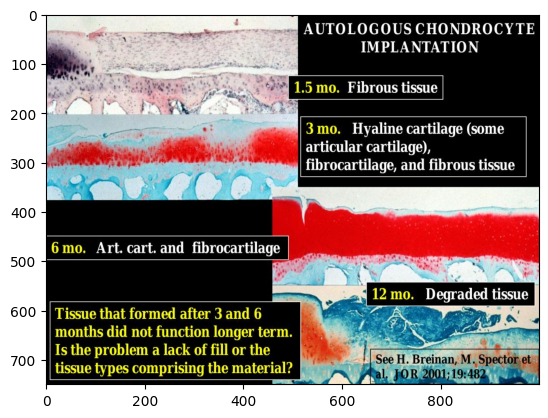

--------------------
Example 2:
query: What are the specific outcomes of using autologous chondrocyte implantation in canine studies?
answer: The page shows a graph comparing the percentage of original defect area in canine studies using different methods of autologous chondrocyte implantation (ACI). The outcomes measured include the presence of hyaline cartilage, fibrocartilage, and fibrous tissue at 15 weeks post-operation. The graph compares untreated control, CAC alone, CAC/Collagen II <12 hr, and CAC/Collagen II 4 wk. The conclusion states that a cell-seeded matrix is better than the current method of ACI.
type: fully answerable


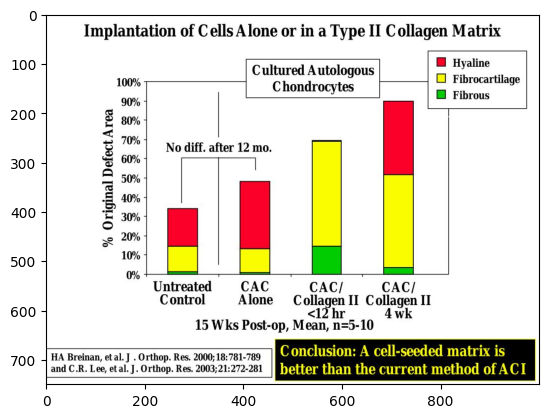

--------------------
Example 3:
query: What are the specific outcomes of using autologous chondrocyte implantation in canine studies?
answer: Based on the image, the specific outcomes of using autologous chondrocyte implantation (ACI) in canine studies, 15 weeks post-op, include varying percentages of hyaline cartilage, fibrocartilage, and fibrous tissue in the original defect area. The outcomes differ depending on the treatment: Untreated Control, CAC Alone, CAC/Collagen II <12 hr, and CAC/Collagen II 4 wk.
type: fully answerable


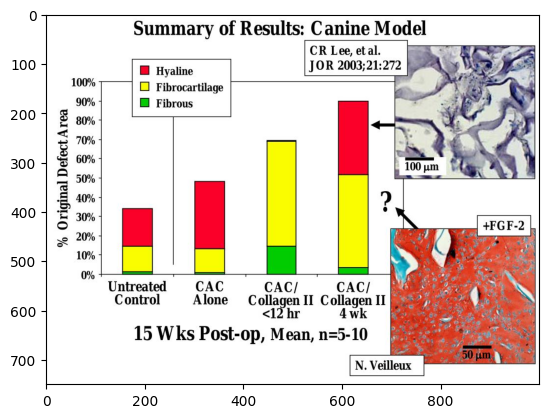

--------------------


In [35]:
num_examples_to_display = 3

for i in range(min(num_examples_to_display, len(ds["corpus"]))):

    qrels = ds["qrels"][i]

    query_id = qrels['query-id']
    corpus_id = qrels['corpus-id']
    answer = qrels['answer']
    type = qrels['is-answerable']
    doc = ds["corpus"][corpus_id]["image"]

    query = ds["queries"][query_id]['query']
    print(f"Example {i+1}:")
    print(f"query: {query}")
    print(f"answer: {answer}")
    print(f"type: {type}")
    plt.imshow(doc)
    plt.show()

    print("-" * 20)

#### Eval

In [42]:
metrics_dataset_beir = vidore_evaluator_beir.evaluate_dataset(
    ds=ds,
    batch_query=4,    # taille de lot pour l’encodage des requêtes
    batch_passage=4,  # taille de lot pour l’encodage des passages
    batch_score=8,    # taille de lot pour le scoring (get_scores)
)

Dataloader pre-batching for passages: 100%|██████████| 26/26 [10:09<00:00, 23.46s/it]


In [43]:

print(metrics_dataset_beir)

{'ndcg_at_1': 0.5, 'ndcg_at_3': 0.50045, 'ndcg_at_5': 0.52957, 'ndcg_at_10': 0.56038, 'ndcg_at_20': 0.58971, 'ndcg_at_50': 0.61577, 'ndcg_at_100': 0.62704, 'map_at_1': 0.30017, 'map_at_3': 0.39673, 'map_at_5': 0.43341, 'map_at_10': 0.46099, 'map_at_20': 0.47574, 'map_at_50': 0.48431, 'map_at_100': 0.48674, 'recall_at_1': 0.30017, 'recall_at_3': 0.47539, 'recall_at_5': 0.56894, 'recall_at_10': 0.6647, 'recall_at_20': 0.74992, 'recall_at_50': 0.8351, 'recall_at_100': 0.87374, 'precision_at_1': 0.5, 'precision_at_3': 0.30417, 'precision_at_5': 0.23875, 'precision_at_10': 0.15375, 'precision_at_20': 0.09438, 'precision_at_50': 0.04512, 'precision_at_100': 0.02512, 'mrr_at_1': 0.4875, 'mrr_at_3': 0.5895833333333331, 'mrr_at_5': 0.6133333333333333, 'mrr_at_10': 0.621750992063492, 'mrr_at_20': 0.6249988292957043, 'mrr_at_50': 0.6264428437152622, 'mrr_at_100': 0.6265229719203903, 'naucs_at_1_max': np.float64(0.3385576282478344), 'naucs_at_1_std': np.float64(-0.005463024650233231), 'naucs_at_1_

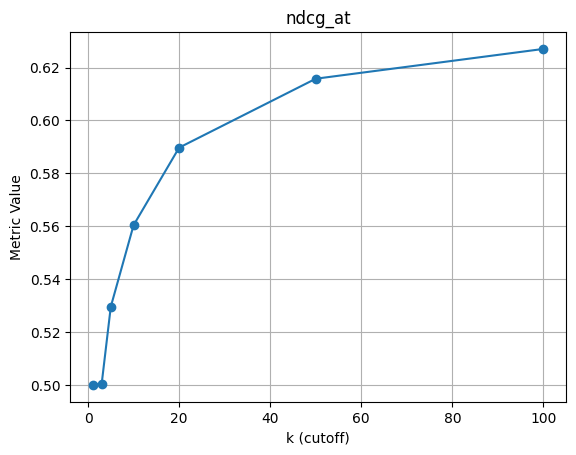

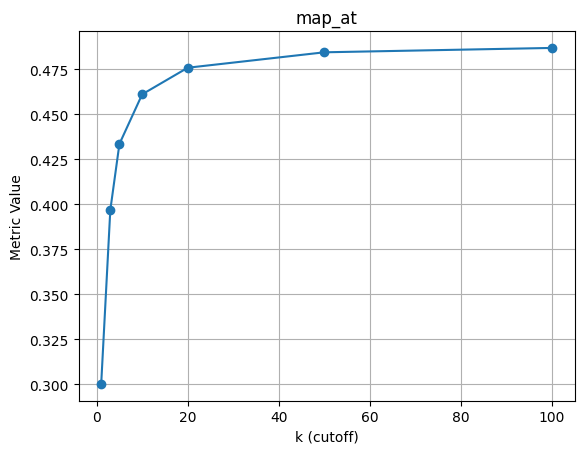

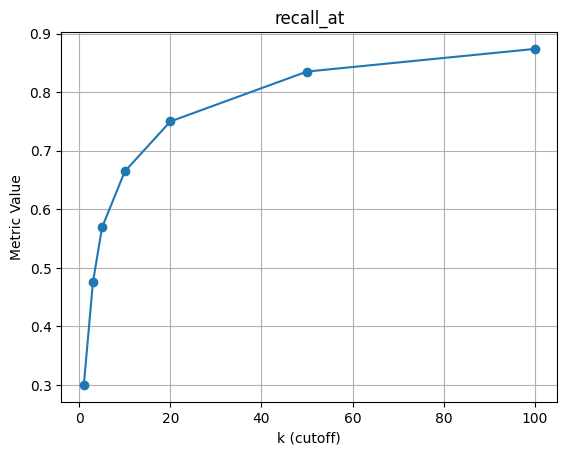

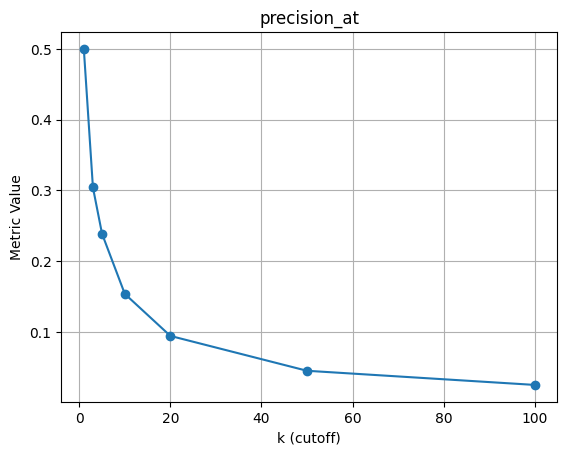

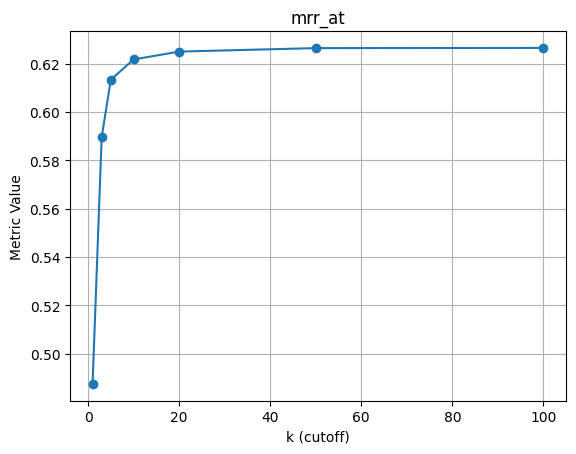

In [49]:
metric_types = ["ndcg_at", "map_at", "recall_at", "precision_at", "mrr_at"]

for metric_type in metric_types:
    # Filtrer les métriques dont le nom commence par metric_type
    filtered = {
        name: value
        for name, value in metrics_dataset_beir.items()
        if name.startswith(metric_type)
    }
    if not filtered:
        continue

    # Extraire le cutoff (int) depuis le nom de la métrique
    cutoffs = [int(name.split("_")[-1]) for name in filtered]
    values = filtered.values()


    # Trier par cutoff
    sorted_pairs = sorted(zip(cutoffs, values), key=lambda x: x[0])
    x, y = zip(*sorted_pairs)

    # Tracé
    plt.figure()
    plt.plot(x, y, marker="o")
    plt.title(metric_type)
    plt.xlabel("k (cutoff)")
    plt.ylabel("Metric Value")
    plt.grid(True)
    plt.show()
